In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os

base_dir = '/content/drive/MyDrive/chest_xray'  # Adjust path if needed

print("Train folder contains:", os.listdir(os.path.join(base_dir, 'train')))
print("Validation folder contains:", os.listdir(os.path.join(base_dir, 'val')))
print("Test folder contains:", os.listdir(os.path.join(base_dir, 'test')))


Train folder contains: ['NORMAL', 'PNEUMONIA']
Validation folder contains: ['NORMAL', 'PNEUMONIA']
Test folder contains: ['NORMAL', 'PNEUMONIA']


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    base_dir + '/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    base_dir + '/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,521 (91.20 MB)

 Trainable params: 23,907,521 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)


Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 1626s 10s/step - accuracy: 0.8519 - loss: 0.3447 - val_accuracy: 0.8125 - val_loss: 0.4138
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 575s 3s/step - accuracy: 0.9573 - loss: 0.1194 - val_accuracy: 0.8125 - val_loss: 0.3267
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 558s 3s/step - accuracy: 0.9687 - loss: 0.0886 - val_accuracy: 0.7500 - val_loss: 0.5780
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 579s 4s/step - accuracy: 0.9780 - loss: 0.0632 - val_accuracy: 0.8125 - val_loss: 0.3511
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 633s 4s/step - accuracy: 0.9844 - loss: 0.0478 - val_accuracy: 0.7500 - val_loss: 0.7924


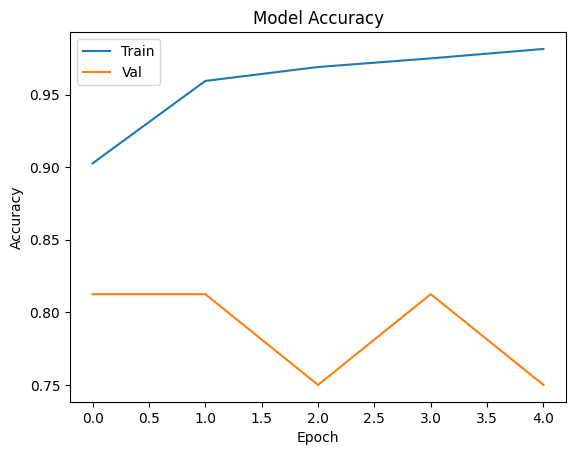

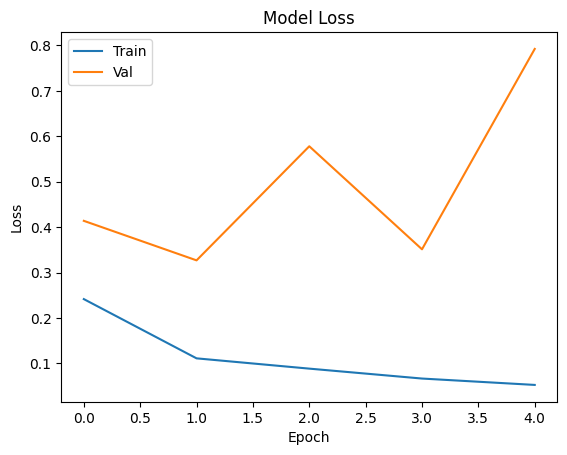

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


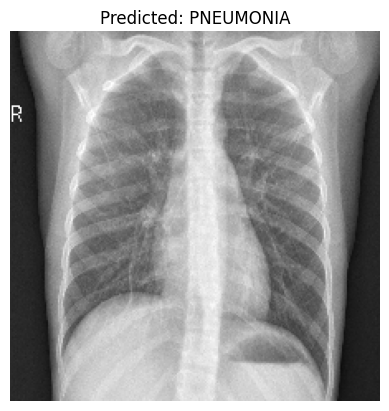

In [18]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Path to test image (change filename as needed)
img_path = '/content/drive/MyDrive/chest_xray/test/NORMAL/IM-0003-0001.jpeg'

# Load image and preprocess
img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) / 255.

# Predict
prediction = model.predict(img_tensor)
predicted_class = 'PNEUMONIA' if prediction[0][0] > 0.5 else 'NORMAL'

# Show image + prediction
plt.imshow(img)
plt.title(f'Predicted: {predicted_class}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


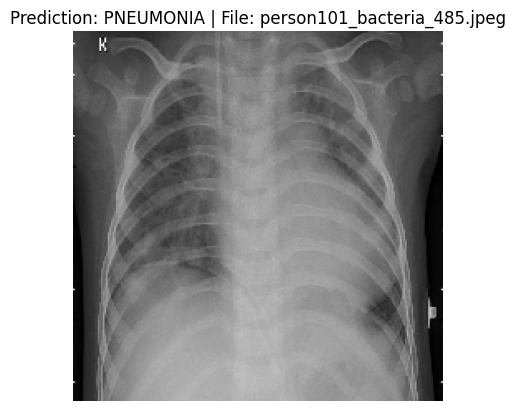

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


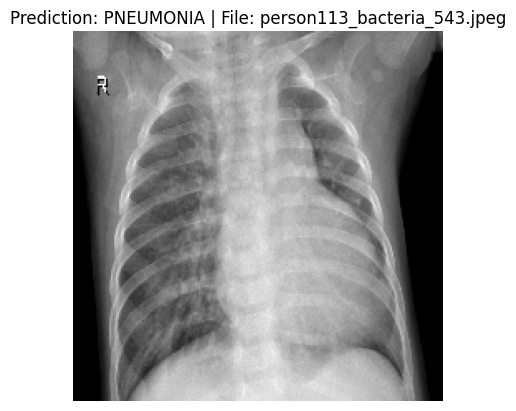

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


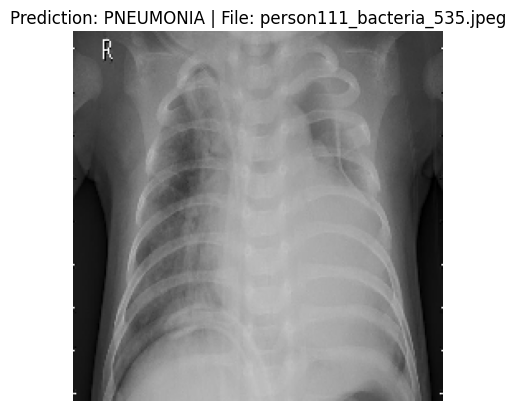

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


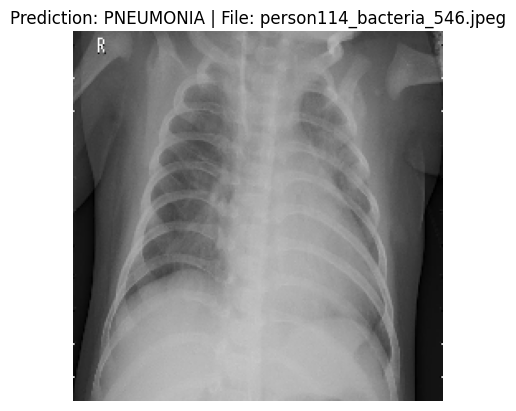

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


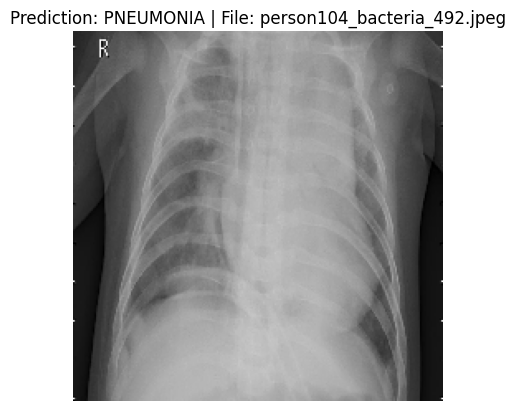

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


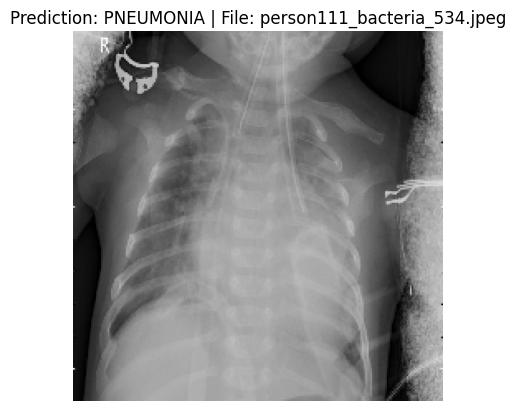

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


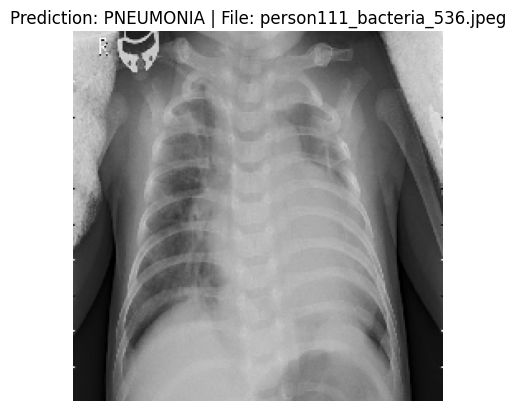

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


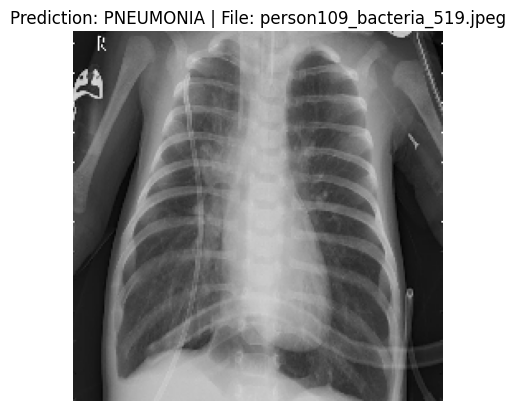

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


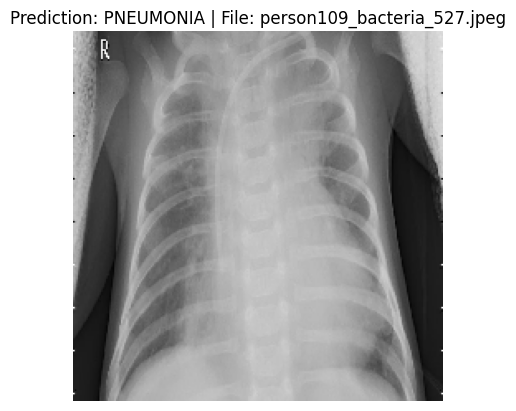

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


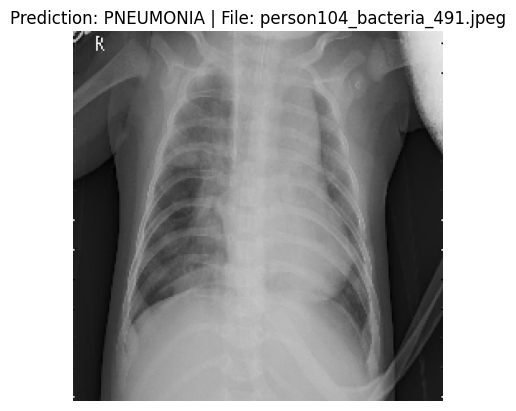

In [22]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# 🔁 Set test folder path (NORMAL or PNEUMONIA)
test_folder = '/content/drive/MyDrive/chest_xray/test/PNEUMONIA'

# Get list of images
image_files = os.listdir(test_folder)

# Test and predict on first 10 images (you can change this range)
for img_name in image_files[:10]:
    img_path = os.path.join(test_folder, img_name)

    # Load and preprocess image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Prediction
    prediction = model.predict(img_array)
    predicted_class = 'PNEUMONIA' if prediction[0][0] > 0.5 else 'NORMAL'

    # Show image + result
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class} | File: {img_name}")
    plt.axis('off')
    plt.show()
